# Linear Regression Project: simulating a real case

A company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website, and this analysis will help the compay to figure it out!

NOTE: The data here reported are fake, no real credit card numbers or emails are reported. 

Credits: the data and the problem text are taken from the course  "Python for Data Science and Machine Learning Bootcamp" of Jose Portilla, from Udemy. This document reports my solution.

## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Get the Data

The data are stored in the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [4]:
customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Comparison between the Time on Website and Yearly Amount Spent columns. Investigating the correlation.**

In [8]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
import scipy.stats as stats

C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


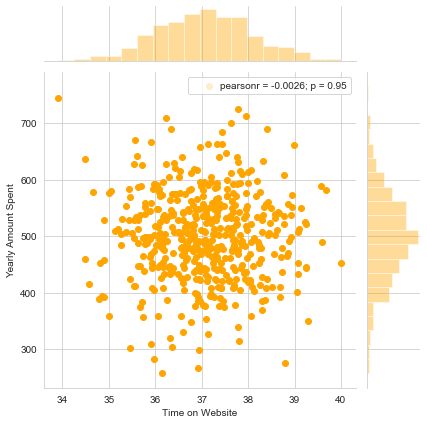

In [32]:
#both following solutions are deprecated, but not found better
g = sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,color='orange',stat_func=stats.pearsonr)
#g.annotate(stats.pearsonr)
sns.set_style(style='whitegrid')

** The same but with the Time on App column instead. **

C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


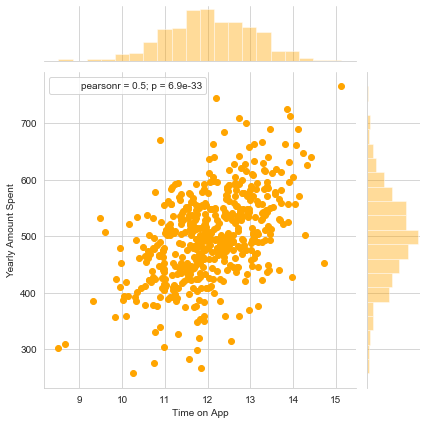

In [36]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,color='orange',stat_func=stats.pearsonr)

** Comparing Time on App and Length of Membership.**

C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


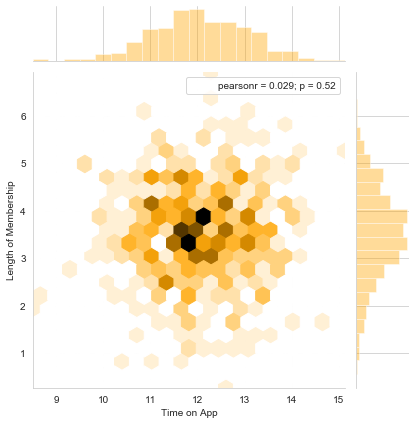

In [35]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,color='orange',kind='hex',
              stat_func=stats.pearsonr)

**Explore these types of relationships across the entire data set.**

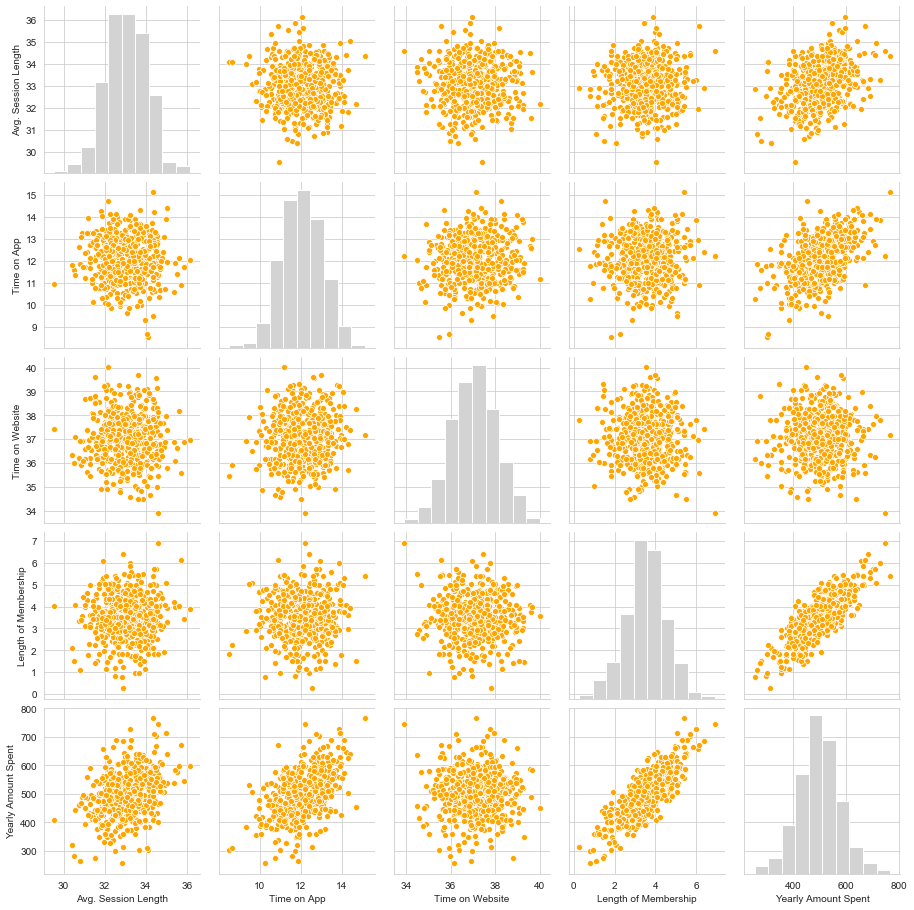

In [38]:
g = sns.pairplot(data=customers,plot_kws={'color':'orange'},diag_kws= {'color': 'lightgray'})

**Based off this preliminary "visual" analisis of correlationit seems that "Time on App" and "Lenght of Membership" are the most correlated feature with Yearly Amount Spent**

**Create a linear model plot of  Yearly Amount Spent vs. Length of Membership.**

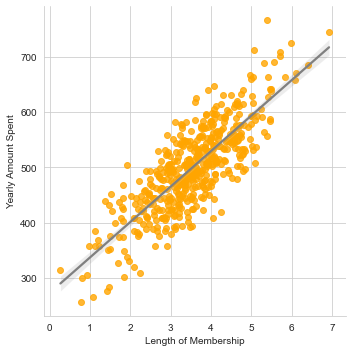

In [39]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,
          line_kws={'color': 'gray'},scatter_kws={'color':'orange'})

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [15]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 
              'Length of Membership']]

In [17]:
y = customers['Yearly Amount Spent']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

Now its time to train our model on our training data!

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [23]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [24]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

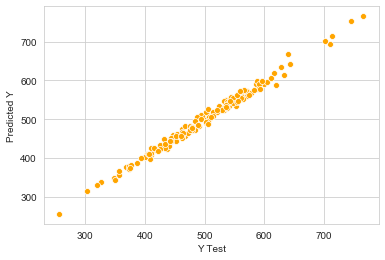

In [40]:
f = sns.scatterplot(x=y_test,y=predictions,color='orange')
f.set_xlabel('Y Test')
f.set_ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [26]:
from sklearn import metrics

In [27]:
mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [28]:
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plotting histogram of the residuals to check normality**

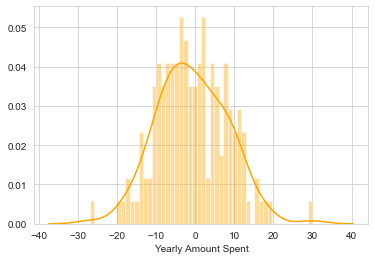

In [41]:
sns.distplot(a=(y_test-predictions),bins=50,color='orange')

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [30]:
coeff = pd.DataFrame(data=lm.coef_,index=X_test.columns,columns=['Coefficient'])
coeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can we interpret these coefficients? **

Coefficients describe the increment (with sign) of the "Yearly Amount Spent" by the client for the related variable.

**Shoould the company focus more on their mobile app or on their website?**

It is then clear that the most influential paramter is the "Lenght of Membership". however, between "Time on App" and "Time on Website", the former as a dominant impact on what is the "Yearly Amount Spent" by the client, that is the company revenue. This implies that the company should focus on the App improvement, rather then the Website one.